## Mini Project for Bioinformatics Track: 

The genetic code of all living organisms are represented by a long sequence of simple molecules called nucleotides, or bases, which makes up the Deoxyribonucleic acid, better known as DNA. There are only four such nucleotides, and the entire genetic code of a human can be seen as a simple, though 3 billion long, string of the letters A, C, G, and T. Analyzing DNA data to gain increased biological understanding is much about searching in (long) strings for certain string patterns involving the letters A, C, G, and T. This is an integral part of bioinformatics, a scientific discipline addressing the use of computers to search for, explore, and use information about genes, nucleic acids, and proteins.

** FASTQ ** format is a text-based format for storing both a biological sequence (usually nucleotide sequence) and its corresponding quality scores. Both the sequence letter and quality score are each encoded with a single ASCII character for brevity.

A FASTQ file normally uses four lines per sequence.
* Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
* Line 2 is the raw sequence letters.
* Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
* Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

In [61]:
!head -4 DNA.fastq

@HWI-M20149:202:000000000-AF422:1:1101:16309:1827 2:N:0:CAAATTCGGGAT
CCTGTTTGCTCCCCTCGCTTTCGTACCTCAGCGTCCATTCTTGTCCAGTCAGTCGCCTTCGCCACTGGTGTTCTTCCGTATATCTACGACTTTCACCTCTACACTCGGAATTCCACTCTCCTCTCCTATCTTCTAGCTATCTCGTTTCAATGGCTGTTCTGGCGTTGAGCTCCTGGCTTTCCCCTCTGACTTGATTATCCTCCTACGTACTCTTTACGCCCACTCCTTCCTATTCTCGCTTGCTTCCTCCT
+
AAA1>FD1BFFFGG1A1EFGGGEB00AGF111AAA0/D222A1DB121D111B1AA/AEH/EE//AB>F0BEH@F2@/10B1BFG21///?EGF2F1FGH1B10>0////?FE121>01BBBGGF011211BF>221>22<120?<?F22221<0/?<1<111/?<-.1<<1<110<<CCG00C<.<0=GGD<00:000;0:/::::.0:::0BF####################################


## Steps to complete the project: 
<font color=blue>
*  ### Read sequence from a file (DNA.fastq)
* ### Create an array for sequence data 
* ### Calcuate counts for each necleotide (A, C, G, T)
* ### Plot necleotide base counts
* ### Calcuate frequency of each necleotide (A, C, G, T)
* ### Plot necleotide base frequency    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Extract sequence from file

In [52]:
seq_list = []
with open('DNA.fastq','r') as f:
    content=f.readlines()

for i, line in enumerate(content):
    if i % 4 == 1:
        seq_list.append(line)
           
print(seq_list)  
       

['CCTGTTTGCTCCCCTCGCTTTCGTACCTCAGCGTCCATTCTTGTCCAGTCAGTCGCCTTCGCCACTGGTGTTCTTCCGTATATCTACGACTTTCACCTCTACACTCGGAATTCCACTCTCCTCTCCTATCTTCTAGCTATCTCGTTTCAATGGCTGTTCTGGCGTTGAGCTCCTGGCTTTCCCCTCTGACTTGATTATCCTCCTACGTACTCTTTACGCCCACTCCTTCCTATTCTCGCTTGCTTCCTCCT\n', 'CCTCTTCGCTCCCCTCGCTTTCGTCCCTCAGCGTCAGTTTTGGCCCAGTAGCCTGCCTTCGCCATCGGTGTTCTTTCTCATCTCTGTGCATTTCACCGCTCCACTACGTATTCCCTTTACCTCTACTGTCTTCTAGACCTCTAGTTTCCTTCTCCCTTTTCCCATTCGACCCCTGGCTTTCGCCAGTTGCTTTTCTGCCCCCCTTACCACCCTTTCAACCCCATTCATCCCGATCACGCCTGCCACCTCCT\n', 'CCCGTTTGCTCCCCTAGCTGTCGTCTCTGAGTGTCAGTTTTGGCCCCGTAGTGTGCCTTCGCCCTTGTTGTTCTTCCTAATATCTTCTCATTTCACCGCTACCCTAGGCCTTCCCTCTACCTCTCCCACCCTCTCGTCTAGCAGTTTCCACTTCTTTTCTGGTTTTCAGCCCCATTCTTTAACATCTGTCTTACTACACATCCTCCATCCTCTTTATTCCCATTTCTTCCTTTTTACTCTTCCATCCTCTT\n', 'CCTGTTTGCTACCCACACTTTCGTTCCTCAACGTCAGTTGTTTATAAAAAGTTGTCTTTGCCTACGATATTTCTCTATGTATACACAGACTTTACCCCTACTCATAAAATTTTACTTTTCTATTATCAACTCTAGTATATCAGTATTAAACATTTAATTAAAGTTAAGTTTTAAAATTTAATATTTAACTTAAAATACCGTCTACGAACCCTTTTCGCACAATTATT

### Count nucleotides 

In [56]:
# A function to count occurances by a single base
def count(dna, base):
    m = []   # matches for base in dna: m[i]=True if dna[i]==base
    for c in dna:
        m.append(c == base)
    return sum(m)


In [7]:
count(seq_list[1], 'A')

28

In [18]:
# A function to count occurances of all 4 bases
# input: list of dna
# output: lists of A, C, G, T count
def freq_lists(dna_list):
    dna_count= len(dna_list)
    A = [0 for x in range(dna_count)]
    T = [0 for x in range(dna_count)]
    G = [0 for x in range(dna_count)]
    C = [0 for x in range(dna_count)]
    seq_index = 0
    for dna in dna_list:
        for index, base in enumerate(dna):
            if base == 'A':
                A[seq_index] +=1
            elif base == 'C':
                C[seq_index] += 1
            elif base == 'G':
                G[seq_index] += 1
            elif base == 'T':
                T[seq_index] += 1
            elif base == '\n':
                break
        seq_index +=1        
    return A, C, G, T

In [115]:
A, C, G, T = freq_lists(seq_list)
print('A', A)
print('C', C)
print('G', G)
print('T', T)


A [30, 28, 30, 78, 39, 4, 33, 50, 33, 80]
C [92, 105, 92, 53, 75, 85, 113, 79, 89, 47]
G [36, 32, 28, 22, 29, 1, 55, 47, 36, 27]
T [93, 86, 101, 98, 108, 161, 50, 75, 93, 97]


In [118]:
# ceate a numpy array from list A,C,G,T for easy numpy operations
seq_array_init = np.array((A+C+G+T), dtype=int).reshape(4,-1)
print(seq_array_init)

# A transpose of the initial array, where row=(each sequence), col=(A, C, G, T)
seq_array = seq_array_init.T
print("after transpose\n", seq_array)


[[ 30  28  30  78  39   4  33  50  33  80]
 [ 92 105  92  53  75  85 113  79  89  47]
 [ 36  32  28  22  29   1  55  47  36  27]
 [ 93  86 101  98 108 161  50  75  93  97]]
after transpose
 [[ 30  92  36  93]
 [ 28 105  32  86]
 [ 30  92  28 101]
 [ 78  53  22  98]
 [ 39  75  29 108]
 [  4  85   1 161]
 [ 33 113  55  50]
 [ 50  79  47  75]
 [ 33  89  36  93]
 [ 80  47  27  97]]


### Calculate mean, standard deviation of  A, C, G, T counts, plot a bar chart

means [40.5 83.  31.3 96.2]
std: [22.0918537  19.65197191 13.75536259 26.59624034]


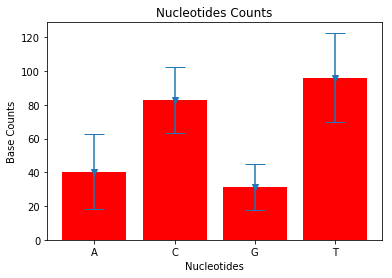

In [124]:
# a.mean(axis=None, dtype=None, out=None, keepdims=False)
# 0 is for column, 1 is for row
means = seq_array.mean(0)
std = seq_array.std(0)
x = [i for i in range(4)]
#x=[4,3,2,1]
xlables = ['A','C','G','T']
print("means", means); print("std:",std)
plt.bar(x, means, color='r')
plt.errorbar(x, means, yerr=std, fmt='v', capsize=10)
plt.xticks(x, xlables)
plt.title('Nucleotides Counts')
plt.xlabel('Nucleotides')
plt.ylabel('Base Counts')
plt.show()

### Calculate frequency of  A, C, G, T 

In [122]:
# calculate A, C, G, T frequency

def frequency(dna):
    
    seq_array_feq = np.zeros((10,4), dtype=float)
    for i in range(dna.shape[0]):
        # sum of a row (one sequency)
        sum_per_seq = sum(dna[i, :])  
        for j in range(dna.shape[1]):
            seq_array_feq[i,j] = dna[i,j]/sum_per_seq
    return seq_array_feq

seq_array_feq = frequency(seq_array)
print(seq_array_feq)
    

[[0.11952191 0.36653386 0.14342629 0.37051793]
 [0.11155378 0.41832669 0.12749004 0.34262948]
 [0.11952191 0.36653386 0.11155378 0.40239044]
 [0.31075697 0.21115538 0.0876494  0.39043825]
 [0.15537849 0.29880478 0.11553785 0.43027888]
 [0.01593625 0.33864542 0.00398406 0.64143426]
 [0.1314741  0.4501992  0.21912351 0.19920319]
 [0.19920319 0.31474104 0.187251   0.29880478]
 [0.1314741  0.35458167 0.14342629 0.37051793]
 [0.3187251  0.187251   0.10756972 0.38645418]]


means [0.16135458 0.33067729 0.1247012  0.38326693]
std: [0.08801535 0.07829471 0.05480224 0.10596112]


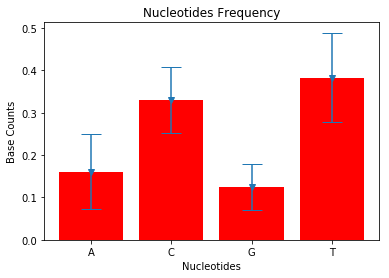

In [125]:

means = seq_array_feq.mean(0)
std = seq_array_feq.std(0)
x = [i for i in range(4)]
#x=[4,3,2,1]
xlables = ['A','C','G','T']
print('means',means); print("std:",std)
plt.bar(x, means, color='r')
plt.errorbar(x, means, yerr=std, fmt='v', capsize=10)
plt.xticks(x, xlables)
plt.title('Nucleotides Frequency')
plt.xlabel('Nucleotides')
plt.ylabel('Base Counts')
plt.show()